<a href="https://colab.research.google.com/github/Sophiajackrich/Stutern-repo/blob/master/JACKRICH_S_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 (Week 4)

>**Note**: Late submissions are ***`penalized`***.

## Name: JACKRICH SOPHIA

<br>

### Please show and display all your calculations and results.

In [2]:
!pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.8 MB/s eta 0:00:00
  Created wheel for nb_black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=a1b37c016b646ffb2cd1ad13dfa8a445ec3914c77b7aab19b0fbe28184c112c7
  Stored in directory: /root/.cache/pip/wheels/a6/5e/1e/a15614d6ea220d070043db3b650d73a8b4938aefd520496c11
Successfully built nb_black


In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import re
import json
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

# Black code formatter (Optional)
%load_ext lab_black

### nb_black Installation And Usage

```bash
# On your command line, run:
pip install nb_black 
```


```python
# For jupyter notebook
%load_ext nb_black

# For jupyter lab
%load_ext lab_black
```


### Qs1

#### The data can be found [here](https://drive.google.com/file/d/1WFMBMR4e5o2B1rzDbOWaTorZRuKU3UOD/view?usp=share_link)

a.) Create a new column called **`Name`** from the **`Artist`** column. Return the name of the artist. \
e.g. \
`Tawaraya SÅtatsu, 17th century, Gold leaf and ink on paper`: `Tawaraya SÅ tatsu` \
`Artist Unknown, circa 190 BCE, Marble `: `Artist Unknown`


b.) Create a new column called **`Date`** from the `Artist` column which extracts the date/period
from the `Artist` column. \
e.g. \
`TÅshÅ«sai Sharaku, 1794, Woodblock print`: `1974` \
`Artist Unknown, 196 BCE, Granodiorite`: `196 BCE`

c.) Finally, Create a new column called **`Art_type`** by extracting values from `Artist` column. \
e.g. \
`TÅshÅ«sai Sharaku, 1794, Woodblock print`: `Woodblock print` \
`Artist Unknown, 196 BCE, Granodiorite`: `Granodiorite`

* To validate your results, find the **`unique values`** in **`each column`** you created.

In [ ]:
# 1a Enter your solution here
# loading my data
art_data = pd.read_csv("art.csv")

# make a copy of my data
art = art_data.copy()
art.head(2)

,Name,Genuine,Category,Buy,Sell,Color 1,Color 2,Size,Real Artwork Title,Artist,Museum Description,Source,Source Notes,Version,HHA Concept 1,HHA Concept 2,HHA Series,HHA Set,Interact,Tag,Speaker Type,Lighting Type,Catalog,Filename,Internal ID,Unique Entry ID
0,academic painting,Yes,Wall-mounted,4980,1245,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianMan,12619,xfTf9sfyLkxHQEz4u
1,academic painting,No,Wall-mounted,4980,0,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianManFake,12620,5KNFAo3LkdTTJPQkd


In [ ]:
art.shape

(70, 26)

In [ ]:
art.isnull().sum()

Name                   0
Genuine                0
Category               0
Buy                    0
Sell                   0
Color 1                0
Color 2                0
Size                   0
Real Artwork Title     0
Artist                 0
Museum Description     0
Source                 0
Source Notes          70
Version                0
HHA Concept 1          0
HHA Concept 2          0
HHA Series             0
HHA Set                0
Interact               0
Tag                    0
Speaker Type           0
Lighting Type          0
Catalog                0
Filename               0
Internal ID            0
Unique Entry ID        0
dtype: int64

In [ ]:
art.duplicated().sum()

0

In [ ]:
artist = art["Artist"]
artist[:]

0            Leonardo da Vinci, circa 1487, Pen and ink on paper
1            Leonardo da Vinci, circa 1487, Pen and ink on paper
2                        Rembrandt van Rijn, 1642, Oil on canvas
3                        Rembrandt van Rijn, 1642, Oil on canvas
4                    Artist Unknown, 1000-400 BCE, Fired pottery
5                    Artist Unknown, 1000-400 BCE, Fired pottery
6                       Thomas Gainsborough, 1770, Oil on canvas
7                       Thomas Gainsborough, 1770, Oil on canvas
8                          Artist Unknown, circa 130 BCE, Marble
9                          Artist Unknown, circa 130 BCE, Marble
10                     Georges Seurat, circa 1885, Oil on canvas
11                     Jean-François Millet, 1857, Oil on canvas
12                          Itō Jakuchū, 18th century, Dyed silk
13                          Itō Jakuchū, 18th century, Dyed silk
14               Katsushika Hokusai, circa 1831, Woodblock print
15                       

In [ ]:
# # Extract the names from Artist column and store in a new column
# artist = art.get("Artist")
# artist
# # Extract the first and last names by regex
# pattern =r"^(\w+(?:\s+\w+[-]?)*)\s+(\w+(?:\s+\w+[-]?)*)[\s\S]*$"
# art1 = artist.str.extract(pattern, flags=re.I, expand=True)


In [ ]:
# art1[:2]

,0,1
0,Leonardo da,Vinci
1,Leonardo da,Vinci


In [ ]:
# 1a. Extract the name from artist column by using split by comma 
# and expanding it to pick the first index
art["Artist Name"] = art["Artist"].str.split(",", expand=True)[0]
art["Artist Name"]

0                 Leonardo da Vinci
1                 Leonardo da Vinci
2                Rembrandt van Rijn
3                Rembrandt van Rijn
4                    Artist Unknown
5                    Artist Unknown
6               Thomas Gainsborough
7               Thomas Gainsborough
8                    Artist Unknown
9                    Artist Unknown
10                   Georges Seurat
11             Jean-François Millet
12                      Itō Jakuchū
13                      Itō Jakuchū
14               Katsushika Hokusai
15                    Auguste Rodin
16                Leonardo da Vinci
17                Leonardo da Vinci
18                 Vincent van Gogh
19                     Michelangelo
20                     Michelangelo
21    Joseph Mallord William Turner
22               Hishikawa Moronobu
23               Hishikawa Moronobu
24            Thomas Ridgeway Gould
25                   Artist Unknown
26                   Artist Unknown
27              Giuseppe Arc

In [ ]:
# Perporming proper check
miss_val = art["Artist Name"].isnull().sum()
dup = art["Artist Name"].duplicated().sum()
print(f"Missing value is: {miss_val}")
print()
print(f"Duplicated value is: {dup}")

Missing value is: 0

Duplicated value is: 42


There are duplicated values:
 * Because from the original dataframe, i noted same artists possess more than one art type, and most of the art types are unique, while the duplicated art types possessed by same artist migh be as a result of it being displayed on seperate date or other factors may apply.

In [ ]:
art.head(2)

,Name,Genuine,Category,Buy,Sell,Color 1,Color 2,Size,Real Artwork Title,Artist,Museum Description,Source,Source Notes,Version,HHA Concept 1,HHA Concept 2,HHA Series,HHA Set,Interact,Tag,Speaker Type,Lighting Type,Catalog,Filename,Internal ID,Unique Entry ID,Artist Name
0,academic painting,Yes,Wall-mounted,4980,1245,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianMan,12619,xfTf9sfyLkxHQEz4u,Leonardo da Vinci
1,academic painting,No,Wall-mounted,4980,0,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianManFake,12620,5KNFAo3LkdTTJPQkd,Leonardo da Vinci


In [ ]:
# 1b Create a new column called Date from the Artist column which extracts the date/period from the Artist column.
# Using split by comma and index to extract date/period
pattern = r"((?:circa\s)?\d+\w+[\s+?\w]*)"
art["Date/Period"] = art["Artist"].str.extract(pattern, re.I, expand=True)
art["Date/Period"][:]

0          circa 1487
1          circa 1487
2                1642
3                1642
4                1000
5                1000
6                1770
7                1770
8       circa 130 BCE
9       circa 130 BCE
10         circa 1885
11               1857
12       18th century
13       18th century
14         circa 1831
15               1902
16         circa 1503
17         circa 1503
18         circa 1888
19         circa 1504
20         circa 1504
21               1839
22       17th century
23       17th century
24         circa 1883
25            196 BCE
26            196 BCE
27         circa 1563
28         circa 1563
29         circa 1850
30    5th century BCE
31    5th century BCE
32         circa 1485
33         circa 1485
34               1883
35     circa 1345 BCE
36     circa 1345 BCE
37               1866
38         circa 1899
39         circa 1882
40         circa 1658
41         circa 1658
42     2nd century CE
43     2nd century CE
44     circa 1000 BCE
45     cir

In [ ]:
# Perporming proper check
miss_val = art["Date/Period"].isna().sum()
dup = art["Date/Period"].duplicated().sum()
print(f"Missing value is: {miss_val}")
print()
print(f"Duplicated value is: {dup}")

Missing value is: 0

Duplicated value is: 29


There are duplicated values because:
 * Artist can display arts on same date/period


In [ ]:
# 1c  Finally, 
# Create a new column called Art_type by extracting values from Artist column.
art["Art Type"] = art["Artist"].str.split(",", expand=True)[2]
art["Art Type"]

0            Pen and ink on paper
1            Pen and ink on paper
2                   Oil on canvas
3                   Oil on canvas
4                   Fired pottery
5                   Fired pottery
6                   Oil on canvas
7                   Oil on canvas
8                          Marble
9                          Marble
10                  Oil on canvas
11                  Oil on canvas
12                      Dyed silk
13                      Dyed silk
14                Woodblock print
15                         Bronze
16                  Oil on poplar
17                  Oil on poplar
18                  Oil on canvas
19                         Marble
20                         Marble
21                  Oil on canvas
22                  Color on silk
23                  Color on silk
24                         Bronze
25                   Granodiorite
26                   Granodiorite
27                  Oil on canvas
28                  Oil on canvas
29            

In [ ]:
# Perporming proper check
miss_val = art["Art Type"].isnull().sum()
dup = art["Art Type"].duplicated().sum()
print(f"Missing value is: {miss_val}")
print()
print(f"Duplicated value is: {dup}")


Missing value is: 2

Duplicated value is: 53


There are two missing values and duplicates in Art type because, 
* For missing values, when i analyzed the original copied dataframe, i found out there are no art types for this artist, 
which is same person from my observation at index[35:36]. 
* While for duplicated values, because different people can share same art


### Qs 2:

#### The data can be found [here](https://drive.google.com/file/d/1xSfSnIWZEWo9WHIXSRfOKRGcCyZ-iNtk/view?usp=share_link)

a.) Write a `Python class`, **`NumericTransformers`**, that can be used to apply the following transformations to columns: `no_of_adults`, `arrival_month` and `no_of_special_requests`

    i.) Sigmoid transformation
    
$$\sigma(x) = \frac {1}{1+e^{-x}}$$
    
    ii.) Cube root transformation
    
$$x_{transformed} = \sqrt[3]{x}$$
    
    
```python
class NumericTransformers:
    """This class is used to apply 'Sigmoid' and 'Cube root'
    transformations to the input data (Vector)."""
    pass
```

Create a `new dataframe` and find the **`descriptive summary statistics`** of the newly transformed features for **each transformation**. \
Hint: Use `.describe()`

b.) Find the **correlation** between the numeric data . Visualize your result using **Seaborn's heatmap**.


In [3]:
# load the data
hotel = pd.read_csv("/content/Hotel Reservations.csv")
hotel.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# check for missing values
print("Missing values are:", hotel.isnull().sum())
print()
# check for duplicates
print("Duplicates values are:", hotel.duplicated().sum())

Missing values are: Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Duplicates values are: 0


In [116]:
# 2ai Enter your solution here
class NumericTransformers:
  """This class is used to apply 'Sigmoid' and 'Cube root'
    transformations to the input data (Vector)."""
  def __init__(self, *, X_vector: np.ndarray) -> None:
    self.X_vector = X_vector.copy() 
    self.exp = np.exp(-(X_vector))
    self.croot = np.cbrt(X_vector)
    self.X_mean = np.mean(X_vector)
    self.X_min = np.min(X_vector)
    self.X_max = np.max(X_vector)

  def __rep__(self) -> str:
    """This returns the string representation, 
    which returns a formatted string which gives a code friendly representation of the object."""
    return(
        f"My class name is {self.__class__.__name__}(Series vector={self.X_vector}, "
        f"Expenential={self.exp}, "
        f"Cube root={self.croot}, "
        f"Mean={round(self.X_mean)}, "
        f"Minimum={self.X_min}, "
        f"Maximum={self.X_max})"
    )
  def show_array_properties(self) -> None:
    """This returns the property of the input arrays passed into this method"""
    array = self.X_vector
    print(f"\nThe Shape: {array.shape}" f"\nThe Dimension: {array.ndim}" f"\nThe Size: {array.size}")
  def sigmoid_transform(self) -> np.ndarray:
    """This method returns the sigmoid form of the given vector
    i.e the vector represents any real number with the function 
    defined as (1/(1+e^-x)), where x is the vector."""
    X_sig = 1 / (1 + self.exp)
    return X_sig
  def cube_transform(self) -> np.ndarray:
    """This method returns the cube form of the given vector
    i.e where x is the vector, i would take the cube root of x in numpy format
    Syntax: X_cube = np.cbrt()."""
    X_cube = self.croot
    return X_cube
  def normalize(self) -> np.ndarray:
    """This returns the normalized form of the vector.
    i.e the values range between 0 and 1.
    Sytax: X_normalized = (X - X_min) / (X_max - X_min)
    """
    X_norm = (self.X_vector - self.X_min) / (self.X_max - self.X_min)
    return X_norm

In [5]:
# 2ai. a.) Write a Python class, NumericTransformers, 
# that can be used to apply the following transformations to columns: 
# no_of_adults, arrival_month and no_of_special_requests
features = ["no_of_adults", "arrival_month", "no_of_special_requests"]
X_feat = hotel[features].copy()
X_feat

,no_of_adults,arrival_month,no_of_special_requests
0,2,10,0
1,2,11,1
2,1,2,0
3,2,5,0
4,2,4,0
...,...,...,...
36270,3,8,1
36271,2,10,2
36272,2,7,2
36273,2,4,0


In [6]:
#2ai. Numeric Transform class for no_of_adults, arrival_month, no_of_special_requests
# SIGMOID METHOD FOR: no_of_adults
X_adults = X_feat["no_of_adults"]
print("The no_adults data: ",X_adults.head(1))
#  Apply the class transformations on 'no_of_adults', 
print()
# Instantiate class
print("Instantiating Numeric Transform class of no_of_adults:")
Num_T = NumericTransformers(X_vector=X_adults)
print(Num_T)
print()
# Using the class, show array properties
print("The array properties of no_of_adults:")
print(Num_T.show_array_properties())
print()
print("The sigmoid transformation of no_of_adults:")
# Using the class, get the sigmoid method
print(Num_T.sigmoid_transform())
print()

# SIGMOID METHOD FOR: arrival_month
X_arrival = X_feat["arrival_month"]
print("The arrival_month data: ",X_arrival.head(1))
print()
#  Apply the class transformations on 'arrival_month', 
# Instantiate class
print("Instantiating Numeric Transform class of arrival_month:")
Num_T = NumericTransformers(X_vector=X_arrival)
print(Num_T)
print()
# Using the class, show array properties
print("The array properties of arrival_month:")
print(Num_T.show_array_properties())
print()
print("The sigmoid transformation of arrival_month:")
# Using the class, get the sigmoid method
print(Num_T.sigmoid_transform())
print()

# SIGMOID METHOD FOR: "no_of_special_requests"
X_req = X_feat["no_of_special_requests"]
print("The no_of_special_requests data: ",X_req.head(1))
#  Apply the class transformations on "no_of_special_requests", 
print()
# Instantiate class
print("Instantiating Numeric Transform class of no_of_special_requests:")
Num_T = NumericTransformers(X_vector=X_req)
print(Num_T)
print()
# Using the class, show array properties
print("The array properties of no_of_special_requests:")
print(Num_T.show_array_properties())
print()
print("The sigmoid transformation of no_of_special_requests:")
# Using the class, get the sigmoid method
print(Num_T.sigmoid_transform())

The no_adults data:  0    2
Name: no_of_adults, dtype: int64

Instantiating Numeric Transform class of no_of_adults:

The array properties of no_of_adults:

The Shape: (36275,)
The Dimension: 1
The Size: 36275
None

The sigmoid transformation of no_of_adults:
0        0.880797
1        0.880797
2        0.731059
3        0.880797
4        0.880797
           ...   
36270    0.952574
36271    0.880797
36272    0.880797
36273    0.880797
36274    0.880797
Name: no_of_adults, Length: 36275, dtype: float64

The arrival_month data:  0    10
Name: arrival_month, dtype: int64

Instantiating Numeric Transform class of arrival_month:

The array properties of arrival_month:

The Shape: (36275,)
The Dimension: 1
The Size: 36275
None

The sigmoid transformation of arrival_month:
0        0.999955
1        0.999983
2        0.880797
3        0.993307
4        0.982014
           ...   
36270    0.999665
36271    0.999955
36272    0.999089
36273    0.982014
36274    0.999994
Name: arrival_month, Len

In [7]:
# 2aii Enter your solution here
# Cube Transformations for no_adults
X_adults = X_feat["no_of_adults"]
print("The no_adults data: ",X_adults.head(1))
# Apply the Numeric class transformations on 'no_of_adults', 
print()
# Instantiate class
print("Instantiating Numeric Transform class of no_of_adults:")
Num_T = NumericTransformers(X_vector=X_adults)
print(Num_T)
print()
print("The cube transformation of arrival_month:")
# Using the class, get the cube method
print(Num_T.cube_transform())
print()

# Cube Transformations arrival_month
X_arrival = X_feat["arrival_month"]
print("The arrival_month: ",X_req.head(1))
#  Apply the Numeric class transformations on 'arrival_month', 
# Instantiate class
print("Instantiating Numeric Transform class of arrival_month:")
Num_T = NumericTransformers(X_vector=X_arrival)
print(Num_T)
print()
print("The cube transformation of arrival_month:")
# Using the class, get the cube method
print(Num_T.cube_transform())
print()

# Cube Transformations for no_of_special_requests
print("The no_of_special_requests data: ",X_req.head(1))
#  Apply the Numeric class transformations on "no_of_special_requests", 
print()
# Instantiate class
print("Instantiating Numeric Transform class of no_of_special_requests:")
Num_T = NumericTransformers(X_vector=X_req)
print(Num_T)
print()
print("The cube transformation of no_of_special_requests:")
# Using the class, get the cube method
print(Num_T.cube_transform())

The no_adults data:  0    2
Name: no_of_adults, dtype: int64

Instantiating Numeric Transform class of no_of_adults:

The cube transformation of arrival_month:
0        1.259921
1        1.259921
2        1.000000
3        1.259921
4        1.259921
           ...   
36270    1.442250
36271    1.259921
36272    1.259921
36273    1.259921
36274    1.259921
Name: no_of_adults, Length: 36275, dtype: float64

The arrival_month:  0    0
Name: no_of_special_requests, dtype: int64
Instantiating Numeric Transform class of arrival_month:

The cube transformation of arrival_month:
0        2.154435
1        2.223980
2        1.259921
3        1.709976
4        1.587401
           ...   
36270    2.000000
36271    2.154435
36272    1.912931
36273    1.587401
36274    2.289428
Name: arrival_month, Length: 36275, dtype: float64

The no_of_special_requests data:  0    0
Name: no_of_special_requests, dtype: int64

Instantiating Numeric Transform class of no_of_special_requests:

The cube transformati

In [8]:
# Numeric Transform class for "X_feat dataframe"
print("The X_feat data: ",X_feat.head(1))
#  Apply the class transformations on "X_feat", 
print()
# Instantiate class
print("Instantiating Numeric Transform class of X_feat:")
Num_T = NumericTransformers(X_vector=X_feat)
print(Num_T)
print()
# Using the class, show array properties
print("The array properties of X_feat:")
print(Num_T.show_array_properties())
print()
print("The sigmoid transformation of X_feat:")
# Using the class, get the sigmoid method
print(Num_T.sigmoid_transform())
print()
print("The cube transformation of X_feat:")
# Using the class, get the cube method
print(Num_T.cube_transform())

The X_feat data:     no_of_adults  arrival_month  no_of_special_requests
0             2             10                       0

Instantiating Numeric Transform class of X_feat:

The array properties of X_feat:

The Shape: (36275, 3)
The Dimension: 2
The Size: 108825
None

The sigmoid transformation of X_feat:
       no_of_adults  arrival_month  no_of_special_requests
0          0.880797       0.999955                0.500000
1          0.880797       0.999983                0.731059
2          0.731059       0.880797                0.500000
3          0.880797       0.993307                0.500000
4          0.880797       0.982014                0.500000
...             ...            ...                     ...
36270      0.952574       0.999665                0.731059
36271      0.880797       0.999955                0.880797
36272      0.880797       0.999089                0.880797
36273      0.880797       0.982014                0.500000
36274      0.880797       0.999994     

In [ ]:
# Getting the descriptive statistics of X_feat 
X_feat.describe()

,no_of_adults,arrival_month,no_of_special_requests
count,36275.000000,36275.000000,36275.000000
mean,1.844962,7.423653,0.619655
std,0.518715,3.069894,0.786236
min,0.000000,1.000000,0.000000
25%,2.000000,5.000000,0.000000
50%,2.000000,8.000000,0.000000
75%,2.000000,10.000000,1.000000
max,4.000000,12.000000,5.000000


<AxesSubplot:>

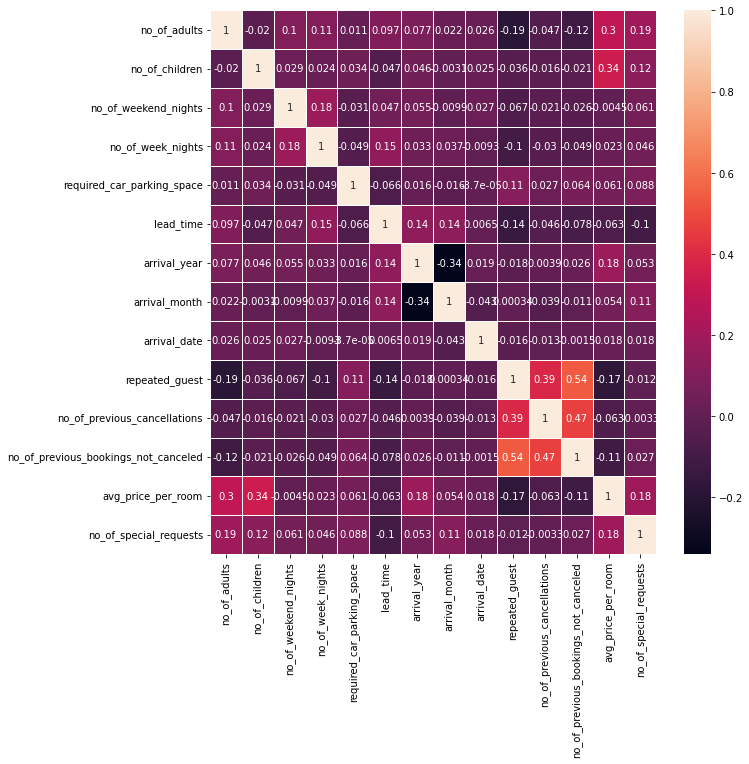

In [10]:
# 2b. Find the correlation between the numeric data.
#  Visualize your result using Seaborn's heatmap.
# Getting the numerical data
numeric_data = hotel.select_dtypes(include="number")
numeric_data.head(2)

# Getting the correlation data
corr_data = numeric_data.corr()
corr_data

# Visualize your result using Seaborn's heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_data, annot=True, linewidth=.5, ax=ax)

# Analysis: The correlation btw the columns of this dataframe, is fairly weak and the only strong correlation seen,
#  is btw 'repeated_guest' & 'no_of_previous_bookings_not_canceled'

### Qs 3:

Given the string shown below

```python
my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)
```
a.) Write a RegEx pattern that displays all the valid:

    i.) URLs

    ii.) phone numbers (11 or more digits)

b.) Given the array shown below:

```python
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))
```

i.) write a code that **normalizes** the array, `A` using:

$$
x_{new} = \frac{x_{i} - x_{min}}{x_{max} - x_{min}}
$$

* Return the **descriptive statistics** of the normalized array.

ii.) Create **histogram** of the normalized array, `A`

In [ ]:
my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)

In [ ]:
# 3ai Enter your solution here
# i.) URLs
pattern = r"\b(?:https?://|www.)\S+(?:w+)?\b"
url = re.findall(pattern, my_string, re.I)
url

["www.barclays-supports.com'.https://zadarma.com/en/tariffs/numbers/united-states/mobile",
 'www.xyz',
 'https://zadarma.com/en/tariffs/numbers/united-states/mobile',
 'https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link']

In [ ]:
# 3aii phone numbers (11 or more digits) 
pattern = r"(\([\+]?\d{1,3}\s*\)\s*\d{3}\s*\d{3}\s*\d{4}|\+\d{1}[-]\d{3}[-]\d{3}[-]\d{4}|\d{4}\s*\d{3,4}\s*\d{2,4})"
phone = re.findall(pattern, my_string, re.I)
phone

['(+234) 287 576 3098', '0808 576 8013', '0803 5771 42', '+1-814-300-8859']

In [114]:
# 3bi 
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))
A

array([[0.69274337, 0.81581711, 0.34440676, 0.04483818, 0.57159726],
       [0.14624543, 0.71877138, 0.3453565 , 0.45700968, 0.97593789],
       [0.78146603, 0.84379005, 0.55511438, 0.94162136, 0.01832582],
       [0.88918391, 0.38975848, 0.23174013, 0.53439423, 0.94469028],
       [0.33099831, 0.90862118, 0.46733161, 0.96728776, 0.76422698],
       [0.78335385, 0.36152748, 0.58778799, 0.24854916, 0.80013865],
       [0.25852661, 0.6726097 , 0.07534543, 0.24686979, 0.35812044],
       [0.17205547, 0.26029535, 0.20180325, 0.0397637 , 0.342869  ],
       [0.46824968, 0.41734943, 0.89952391, 0.08887437, 0.62396599],
       [0.34873677, 0.02596776, 0.7729985 , 0.42201424, 0.97620237]])

In [117]:
# 3bi. write a code that normalizes the array, A using: (A - X_min)/ (A_max - X_min)
# Instantiating Numeric Transformer class for array A:
A_norm = NumericTransformers(X_vector = A)

# Applying the normalize method
A_normalize = A_norm.normalize()
A_normalize # The values are between 0 and 1

array([[0.70407564, 0.83256166, 0.34042063, 0.02767826, 0.57760202],
       [0.13354498, 0.73124825, 0.34141214, 0.45797536, 0.99972388],
       [0.79669995, 0.86176472, 0.5603943 , 0.96389826, 0.        ],
       [0.90915482, 0.38776673, 0.22279939, 0.53876296, 0.96710213],
       [0.32642253, 0.92944687, 0.46875121, 0.99069336, 0.77870281],
       [0.79867079, 0.35829425, 0.59450476, 0.24034761, 0.81619372],
       [0.25076383, 0.68305658, 0.0595271 , 0.23859439, 0.35473738],
       [0.16049004, 0.25261035, 0.19154601, 0.02238063, 0.33881524],
       [0.46970965, 0.41657102, 0.91994953, 0.07365098, 0.63227372],
       [0.34494106, 0.007978  , 0.78786006, 0.42144097, 1.        ]])

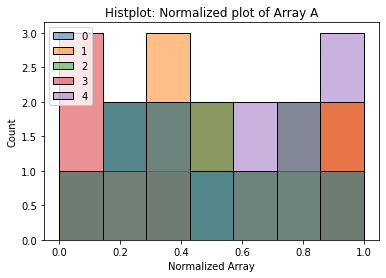

In [118]:
# 3bii  Create histogram of the normalized array, A
# Plot a histogram using seaborn`
sns.histplot(data=A_normalize)
plt.title("Histplot: Normalized plot of Array A")
plt.xlabel("Normalized Array")
plt.show();

### Qs 4

#### The data can be found [here](https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link)

a.) Clean the following columns: `price`, `SSD(GB)`, `warranty(years)`, `Display(inch)` \
Note: Return numerical values for the cleaned columns with the corresponding unit as the appended to the column name. \
e.g. \
SSD(GB) retuns: \
`512 GB HDD|512 GB SSD`: `512` \
The Display(inch) retuns: \
`38.1 cm (15 inch) Display`: `15`

* You might need to create **new columns** with the corresponding **column names**.
* **To validate your result, run**:

```python
df[["price", "SSD(GB)", "warranty(years)", "Display(inch)"]].sample(n=10, random_state=10)
```

b.) 

i.) Create a new column called `RAM_type` which extract the type of RAM. \
e.g. \
`32 GB LPDDR5 RAM`: `LPDDR5`

ii.) Create a new column called `is_SSD` which which checks whether the `RAM` is SSD or not. It returns `True` if it's an `SSD` otherwise, `False`

c.) Using the approriate column, create an new column called `Brand_name` by extracting the brand names. Validate your result by displaying the unique values in `Brand_name`

In [97]:
# loading the laptops data
laptop = pd.read_csv("laptops.csv")
laptop.head(5)
# create a copy
lap = laptop.copy()
lap.head(3)

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light L...,"₹37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4.10 GHz) 2 Cores,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Keyboard,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Damage Protection Add On


In [98]:
lap["price"][:2]

0    ₹37,990
1    ₹35,490
Name: price, dtype: object

In [99]:
# 4ai. price column
pattern= r"((?<=₹)\d{1,2}.\d+.?\d*.?\d*)"
lap["price"] = lap["price"].str.replace(",", "")\
.str.extract(pattern, re.I, expand=True)\
.astype(float)
lap["price"][:3]

0    37990.0
1    35490.0
2    33999.0
Name: price, dtype: float64

In [100]:
lap["SSD"][:2]

0    Display: 15.6" FHD WVA AG Narrow Border
1                                 256 GB SSD
Name: SSD, dtype: object

In [101]:
# 4aii. SSD(GB) column
# Extract the pattern. this should return a pandas series.
fill_value = "unkn"
pattern= r"(\d+\s*(?=[TG]B|(?=SSD)))"
lap["SSD(GB)"] = lap["SSD"].str.extract(pattern, re.I, expand=True)

# fillna values with 'fill_value'
lap["SSD(GB)"] = np.where(lap["SSD(GB)"].isna(), fill_value, lap["SSD(GB)"])
lap["SSD(GB)"]
# get unique values
lap["SSD(GB)"].unique()

array(['unkn', '256 ', '512 ', '1 ', '128 ', '2 ', '4 ', '2', '16 '],
      dtype=object)

In [102]:
lap["warranty"][:2]

0             8 GB DDR4 RAM
1    1 Year Onsite Warranty
Name: warranty, dtype: object

In [103]:
# 4a iii warranty
def clean_warranty(*, value: str)-> str:
  """This function returns the cleaned values of warranty years"""
  Months_len = 12 # Length of onths in a year
  if value.lower().__contains__("month"):
    result = round(float(value.split()[0])/ Months_len, 2)
  elif value.lower().__contains__("year"):
    result = int(value.split()[0])
  else:
    value = result
  return value



In [104]:
# 4a iii
pattern = r"(\d{1,2}\s*\w{4,6})"
# Extract the pattern. This would return a dataframe which,
# should be converted back to a pandas series by flattening it
#lap["warranty"] = lap["warranty"].fillna(value=fill_value)
lap["warranty(years)"] = lap["warranty"].str.extract(pattern, re.I, expand=True).values.flatten()
lap["warranty(years)"] = lap["warranty(years)"].fillna(value=fill_value)
lap["warranty(years)"] = np.where(
    lap["warranty(years)"].str.lower().str.contains(r"(year|months)"),
    lap["warranty(years)"],
    fill_value,
)
lap["warranty(years)"].unique()

<ipython-input-104-e74102b9299d>:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  lap["warranty(years)"].str.lower().str.contains(r"(year|months)"),


array(['unkn', '1 Year', '2 Years', '2 Year', '1 YEAR', '12 Months',
       '12 months', '1 Years', '3 Years', '1 year', '3 Year', '2 year',
       '12 MONTHS', '3 year', '18 Months'], dtype=object)

In [105]:
# 4aiv The Display(inch) retuns: 38.1 cm (15 inch) Display: 15
pattern = r"((?<=\()\d{2}(?=\s*[Inch|inch])|(?<=\()\d{2}.\d+(?=\s*[Inch|inch]))"
lap["Display(inch)"] = lap["Display"].str.extract(pattern, re.I, expand=True)
lap["Display(inch)"] = np.where(lap["Display(inch)"].isna(), fill_value, lap["Display(inch)"])
lap["Display(inch)"].unique()

array(['unkn', '14', '15.6', '17.3', '13.3', '16', '13.6', '16.2', '15',
       '14.1', '16.1', '14.96', '15.3', '13.4', '14.2', '14.5', '13.5',
       '11.6', '13', '17', '12'], dtype=object)

In [106]:
## Getting the samples to validate Question 4a: lap[["price", "SSD(GB)", "warranty(years)", "Display(inch)"]].sample(n=10, random_state=10)
lap[["price", "SSD(GB)", "warranty(years)", "Display(inch)"]].sample(n=10, random_state=10)

,price,SSD(GB),warranty(years),Display(inch)
242,56340.0,256,1 Year,14
441,58900.0,512,1 Year,15.6
260,87701.0,512,1 Year,15.6
546,30490.0,256,1 Year,14
849,24540.0,256,1 Year,14
264,211990.0,1,1 Year,15.6
768,61890.0,1,1 YEAR,15.6
790,103990.0,512,1 Year,15.6
293,74890.0,unkn,unkn,unkn
442,115736.0,1,1 Year,15.6


In [107]:
lap["RAM"].head()

0    RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD
1                                    8 GB DDR4 RAM
2                                    8 GB DDR4 RAM
3                                    8 GB DDR4 RAM
4                                    8 GB DDR4 RAM
Name: RAM, dtype: object

In [108]:
# 4bi. Create a new column called RAM_type which extract the type of RAM.
# e.g. 32 GB LPDDR5 RAM: LPDDR5
pattern = r"(\b(D|L)PDDR[45]|\bDDR4|\bUnified\sMemory)"
lap["Ram_Type"] = lap["RAM"].str.extract(pattern, re.I, expand=True)[0]
lap["Ram_Type"] = np.where(lap["Ram_Type"].isna(), fill_value, lap["Ram_Type"])
lap["Ram_Type"].unique()

array(['DDR4', 'LPDDR4', 'unkn', 'LPDDR5', 'Unified Memory'], dtype=object)

In [110]:
# 4bii  Create a new column called is_SSD which which checks whether the RAM is SSD or not. It returns True if it's an SSD otherwise, False
lap["is_SSD"] = np.where(lap["RAM"].str.contains("SSD"), True, False)
lap["is_SSD"].value_counts()

False    897
True      23
Name: is_SSD, dtype: int64

In [111]:
lap["title"][:2]

0    DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light L...
1       HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop
Name: title, dtype: object

In [112]:
# 4c. Using the approriate column, create an new column called Brand_name by extracting the brand names. 
# Validate your result by displaying the unique values in Brand_name
lap["Brand_name"] = lap["title"].str.replace(" ", ",").str.split(",", expand=True)[0]
lap["Brand_name"].unique()


array(['DELL', 'HP', 'Lenovo', 'ASUS', 'RedmiBook', 'acer', 'Infinix',
       'APPLE', 'MSI', 'SAMSUNG', 'realme', 'ALIENWARE', 'GIGABYTE',
       'Avita', 'Nokia', 'Vaio', 'Mi', 'LG', 'Ultimus'], dtype=object)

In [113]:
# Check dataframe
lap.head(3)

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,SSD(GB),warranty(years),Display(inch),Ram_Type,is_SSD,Brand_name
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light L...,37990.0,"₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4.10 GHz) 2 Cores,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Keyboard,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM,unkn,unkn,unkn,DDR4,True,DELL
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop,35490.0,"₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,256,1 Year,14,DDR4,False,HP
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop,33999.0,"₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Damage Protection Add On,512,1 Year,15.6,DDR4,False,Lenovo
